#IMDB Movies Dataset
Fall 2024 Data Science Project

By: Luke Morelli, Bijan Tahmassebi, Pranav Krishnan, Rahul Krishnagiri

#1. Contributions:

**Luke:**

Dataset Curation and Preprocessing: Refined data cleaning and added text.

Data Exploration and Summary Statistics: Created the histograms and displayed the summary stastistics and correlations. Completed the genre and user_rating ANOVA Test and the Brad Pitt and Matt Damon Man-U Whitney Test (Tests 1 & 3).

ML Algorithm Design/Development: Created the linear regression model.

Visualization, Result Analysis, Conclusion: Created the visualization graphs and refined the conclusion.

Final Tutorial Report Creation: Created the final report and posted on his own github.



**Bijan:**

Dataset Curation and Preprocessing: Wrote the code of the data cleaning.

Visualization, Result Analysis, Conclusion: Refined the conclusion.

Additional (not otherwise listed): Wrote the introduction, formatted the file, and most of this contribution section.


**Pranav:**

Dataset Curation and Preprocessing: Refined data cleaning and added text and helped convert strings to list in df

Data Exploration and Summary Statistics: Completed the chi-squared test (test 2).

ML Algorithm Design/Development: Encoded the catagorical variables using OneHot encoding. Built the three models Neural Network and RandomForestRegressor and helped with Linear Regression model

**Rahul:**

Project Idea: Found the dataset

Visualization, Result Analysis, Conclusion: Wrote the conclusion.

#2. Introduction

Movies are one of the most popular forms of entertainment throughout the world. With compelling storylines, iconic characters and actors, and beautiful choreographic scenes, what's not to love about it? Although most of us are used to seeing films as audience members, filmmakers have an entirely different perspective on movies. Mainly, they want their films to have high profitability and to be well received.

However, there has recently been a major shift in the industry. Ticket sales at movie theaters are declining, and streaming services are on the rise: https://www.forbes.com/sites/scottphillips/2024/06/14/is-the-death-of-movie-theaters-upon-us/. More and more films are even forgoing a theatrical release in favor of streaming. Thus, in an uncertain landscape, movie producers need to understand what aspects of a movie ensure that it will have the best chance of providing them with a return on their investment.

We decided to help out and take a look at a database of around 10,000 movies spanning all the way back until 1903 to try and answer the question, "How can filmmakers statistically produce the highest earning and best received films?"

We want to know what the most important factors are in order to determine our "perfect" movie. So, dive in with us as we begin to use the skills we've learned throughout the semester to create a statistical masterpiece.

#3. Data Cleaning and Curation

We begin by importing the neccessary python libraries for performing an Exploratory Data Analysis.

In [ ]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Next, we input the Movies data into a Pandas dataframe so it is ready for analysis. The data is sourced from Kaggle here: https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset/data. It contains over 9,000 movies from all different countries, genres, and languages.

We first drop some irrelevant columns and remove duplicate movies. We then perform some filtering to remove some nonsensical values from the dataframe. This can be done by ensuring that all movies in the data have a User Rating greater than one, total revenue greater than 1000 (dollars), and a budget greater than 600 (dollars). Lastly, we rename some of the columns for consistency in our analysis.

In [ ]:
df = pd.read_csv("imdb_movies.csv")
df = df[df["status"] == " Released"]
df = df.drop(columns = ["overview", "status", "orig_title"]) # Dropping irrelevent columns
df = df.drop_duplicates(subset = "names")
# Removing nonsensical values
df = df[df["score"] > 1]
df = df[df["revenue"] > 1000]
df = df[df["budget_x"] > 600]
df = df.rename(columns={'names': 'title', 'date_x': 'release_date', 'budget_x': 'budget', 'score': 'user_rating'}) # Renaming columns
df

,title,release_date,user_rating,genre,crew,orig_lang,budget,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...","Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"Annette Bening, Dorothea Fields, Lucas Jade Zu...",English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Sean Connery, Bartholomew 'Barley' Scott Blair...",English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...","Larry Drake, Robert G. Durant, Arnold Vosloo, ...",English,116000000.0,4.756613e+08,US


Now we must fix the datatypes of the date and score columns. We can convert a movie's release date to a Datetime object and its User Rating to an integer.

In [ ]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["user_rating"] = df["user_rating"].astype(int)

df

,title,release_date,user_rating,genre,crew,orig_lang,budget,revenue,country
0,Creed III,2023-03-02,73,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,2022-12-15,78,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-04-05,76,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",English,100000000.0,7.244590e+08,AU
3,Mummies,2023-01-05,70,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...","Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,2023-03-17,61,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73,Drama,"Annette Bening, Dorothea Fields, Lucas Jade Zu...",English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,1990-08-24,54,Action,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",English,9145817.8,6.698361e+06,US
10175,The Russia House,1990-12-21,61,"Drama, Thriller, Romance","Sean Connery, Bartholomew 'Barley' Scott Blair...",English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,1995-07-11,55,"Action, Adventure, Science Fiction, Thriller, ...","Larry Drake, Robert G. Durant, Arnold Vosloo, ...",English,116000000.0,4.756613e+08,US


Furthermore, we must check to ensure our data does not have any missing values:

In [ ]:
df.isna().sum()

,0
title,0
release_date,0
user_rating,0
genre,42
crew,42
orig_lang,0
budget,0
revenue,0
country,0


Unfortunately, there are 42 missing values in both the genre and crew column. Let's take a look at those movies:

In [ ]:
df_na = df[df.isna().any(axis=1)]
df_na

,title,release_date,user_rating,genre,crew,orig_lang,budget,revenue,country
148,Orgasm Inc: The Story of OneTaste,2022-11-05,64,Documentary,NaN,English,77400000.0,431611098.0,US
206,Legend of the Galactic Heroes: Die Neue These ...,2022-09-30,61,Animation,NaN,Japanese,138000000.0,337725907.8,JP
649,Cuento de Primavera-A Spring Tale,2022-12-20,81,"Drama, Fantasy, Mystery",NaN,"Spanish, Castilian",77600000.0,827017257.2,US
938,Cat Pack: A PAW Patrol Exclusive Event,2022-06-24,74,"Animation, Family",NaN,English,92800000.0,609222681.4,US
1174,Beauty Rope Cosmetology,1983-12-02,10,NaN,"Miki Takakura, Miki, Maya Ito, Rena, Ren Osugi...",Japanese,201940000.0,38157314.0,JP
...,...,...,...,...,...,...,...,...,...
9750,Alice Under the Table,2015-10-15,61,Fantasy,NaN,"Spanish, Castilian",170000000.0,295463225.0,ES
10011,Perfumed Garden,2000-06-03,53,NaN,"Ivan Baccarat, Michael, Amy Lindsay, Lisa, Raj...",English,159000000.0,279278382.2,ID
10025,The Girl and the Wooden Horse Torture,1982-12-03,50,NaN,"Serina Nishikawa, Nami Tsuchiya, Waka Oda, , A...",Japanese,163600000.0,812667214.2,JP
10076,The Shoga (Glass and Gas) Company,1990-09-07,37,NaN,NaN,Persian,58670000.0,385960548.2,IR


Given that there seems to be no pattern to the missing data (Missing Completely at Random) and that the total number of rows with missing values make up such a small percentage of the total dataset (less than one percent), these rows can be safely removed without introducing any bias.

In [ ]:
df.dropna(inplace=True)
df

,title,release_date,user_rating,genre,crew,orig_lang,budget,revenue,country
0,Creed III,2023-03-02,73,"Drama, Action","Michael B. Jordan, Adonis Creed, Tessa Thompso...",English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,2022-12-15,78,"Science Fiction, Adventure, Action","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,2023-04-05,76,"Animation, Adventure, Family, Fantasy, Comedy","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",English,100000000.0,7.244590e+08,AU
3,Mummies,2023-01-05,70,"Animation, Comedy, Family, Adventure, Fantasy","Óscar Barberán, Thut (voice), Ana Esther Albor...","Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,2023-03-17,61,Action,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73,Drama,"Annette Bening, Dorothea Fields, Lucas Jade Zu...",English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,1990-08-24,54,Action,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",English,9145817.8,6.698361e+06,US
10175,The Russia House,1990-12-21,61,"Drama, Thriller, Romance","Sean Connery, Bartholomew 'Barley' Scott Blair...",English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,1995-07-11,55,"Action, Adventure, Science Fiction, Thriller, ...","Larry Drake, Robert G. Durant, Arnold Vosloo, ...",English,116000000.0,4.756613e+08,US


In [ ]:
df.shape

(9308, 9)

It can now be determined that our final dataset has 9308 unique movies and nine features. Finally, the following line of code demonstrates that our dataset contains no duplicate movies.

In [ ]:
df.duplicated().value_counts()

,count
False,9308


#4. Exploratory Data Analysis

To begin our Explatory Data Analysis (EDA), we will visualize the distributions of the continous features (Budget, Revenue, and User Ratings).

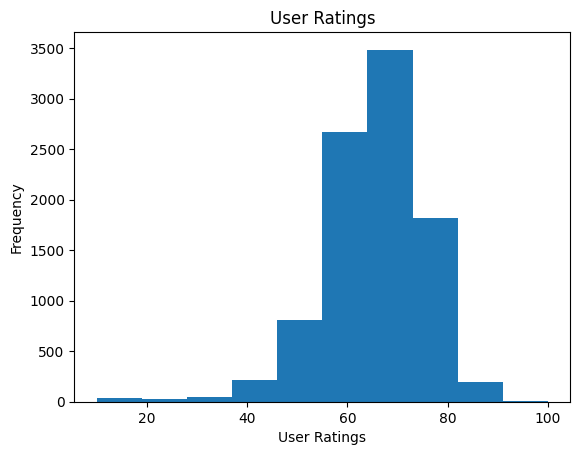

In [ ]:
# Score information
plt.hist(df["user_rating"])
plt.title("User Ratings")
plt.xlabel("User Ratings")
plt.ylabel("Frequency")
plt.show()

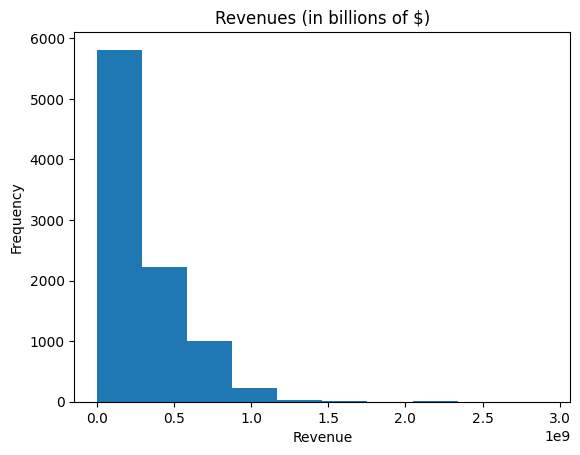

In [ ]:
# Revenue information
plt.hist(df["revenue"])
plt.title("Revenues (in billions of $)")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

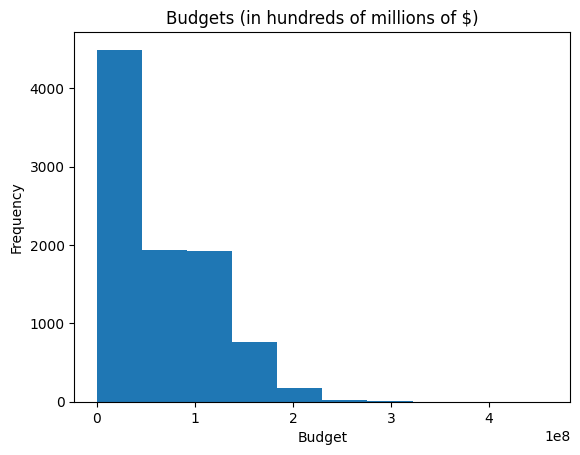

In [ ]:
# Budget information
plt.hist(df["budget"])
plt.title("Budgets (in hundreds of millions of $)")
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.show()

Unsurpisingly, both the budget and revenue columns appear to be right skewed, as Hollywood Blockbusters make up only a small portion of the dataset.

In [ ]:
df.drop(columns=['release_date']).describe()

,user_rating,budget,revenue
count,9308.000000,9.308000e+03,9.308000e+03
mean,64.911796,6.311666e+07,2.578357e+08
std,9.953899,5.420836e+07,2.786345e+08
min,10.000000,5.000000e+03,1.242000e+03
25%,60.000000,1.500000e+07,2.874715e+07
50%,66.000000,5.000000e+07,1.525974e+08
75%,72.000000,1.030000e+08,4.312988e+08
max,100.000000,4.600000e+08,2.923706e+09


The summary statistics table demonstrates the mean and spread of the three numeric columns in the dataset: user_rating, budget, and revenue. User_ratings scores vary from 10 to 100 with a mean of 64.91. Budgets vary from 5000 to 460,000,000 with a mean of 63,116,660 (dollars) - demonstrating that most movies in the dataset are Hollywood Blockbusters with budgets in the millions of dollars. Revenues vary from 1,242 to 2,923,706,000 with a mean of 257,835,700 (dollars) - demonstrating that most movies have greater revenues than budgets.

We will now compute the correlation coefficents between the numeric variables.

In [ ]:
df_numeric = df[['revenue', 'budget', 'user_rating']]
df_numeric.corr()

,revenue,budget,user_rating
revenue,1.000000,0.731944,0.086233
budget,0.731944,1.000000,-0.045653
user_rating,0.086233,-0.045653,1.000000


The correlation matrix demonstrates that there is a strong positive correlation between a movie's budget and revenue while there is almost no correlation between revenue or budget and a movie's user_rating. The linear relationship between a movie's budget and revenue is illustrated by the following scatterplot and line of best fit.

<ipython-input-466-99845b35fd1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['budget'] = df_numeric['budget'].apply(lambda x: x/10**6) # tranforming the data to millions of $
<ipython-input-466-99845b35fd1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['revenue'] = df_numeric['revenue'].apply(lambda x: x/10**6)


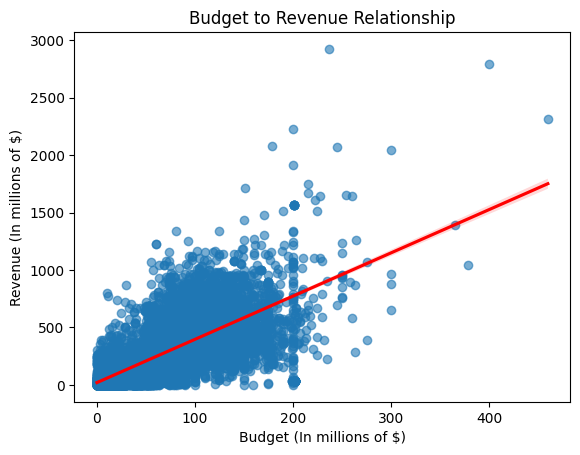

In [ ]:
df_numeric['budget'] = df_numeric['budget'].apply(lambda x: x/10**6) # tranforming the data to millions of $
df_numeric['revenue'] = df_numeric['revenue'].apply(lambda x: x/10**6)
sns.regplot(data=df_numeric, x='budget', y='revenue', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("Budget to Revenue Relationship")
plt.xlabel('Budget (In millions of $)')
plt.ylabel('Revenue (In millions of $)')
plt.show()


# Tests

Now that we have some basic data on scores, revenues, and budgets, we can get into the statistical tests!

## Test 1

The first idea that we are curious about is if a movie's average User Rating varies across genres. Our hypothesis is that a movie's User Rating score will not vary across different genres. Since genre is a categorical variable and we need to compare mean scores across three or more genres, we will perform an ANOVA test with genres and User Ratings to evaluate this hypothesis. You can learn more about the ANOVA test here: https://datatab.net/tutorial/anova.

Before we perform the ANOVA test, we first need to reformat the genre column, as most movies belong to multiple genres. To do this, we will create a new dataframe with rows for each movie-genre combination.

In [ ]:
df_genres = df
df_genres["genre"] = df_genres["genre"].str.replace("\xa0","") # remove special character
df_genres["genre"] = df_genres["genre"].str.split(',') # split the string on commas to separate genres
df_genres = df_genres.explode('genre').reset_index() # create one row for each genre a movie covers
df_genres.head()


,index,title,release_date,user_rating,genre,crew,orig_lang,budget,revenue,country
0,0,Creed III,2023-03-02,73,Drama,"Michael B. Jordan, Adonis Creed, Tessa Thompso...",English,75000000.0,2.716167e+08,AU
1,0,Creed III,2023-03-02,73,Action,"Michael B. Jordan, Adonis Creed, Tessa Thompso...",English,75000000.0,2.716167e+08,AU
2,1,Avatar: The Way of Water,2022-12-15,78,Science Fiction,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,460000000.0,2.316795e+09,AU
3,1,Avatar: The Way of Water,2022-12-15,78,Adventure,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,460000000.0,2.316795e+09,AU
4,1,Avatar: The Way of Water,2022-12-15,78,Action,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",English,460000000.0,2.316795e+09,AU


Now we will display a boxplot of the User Ratings for each genre

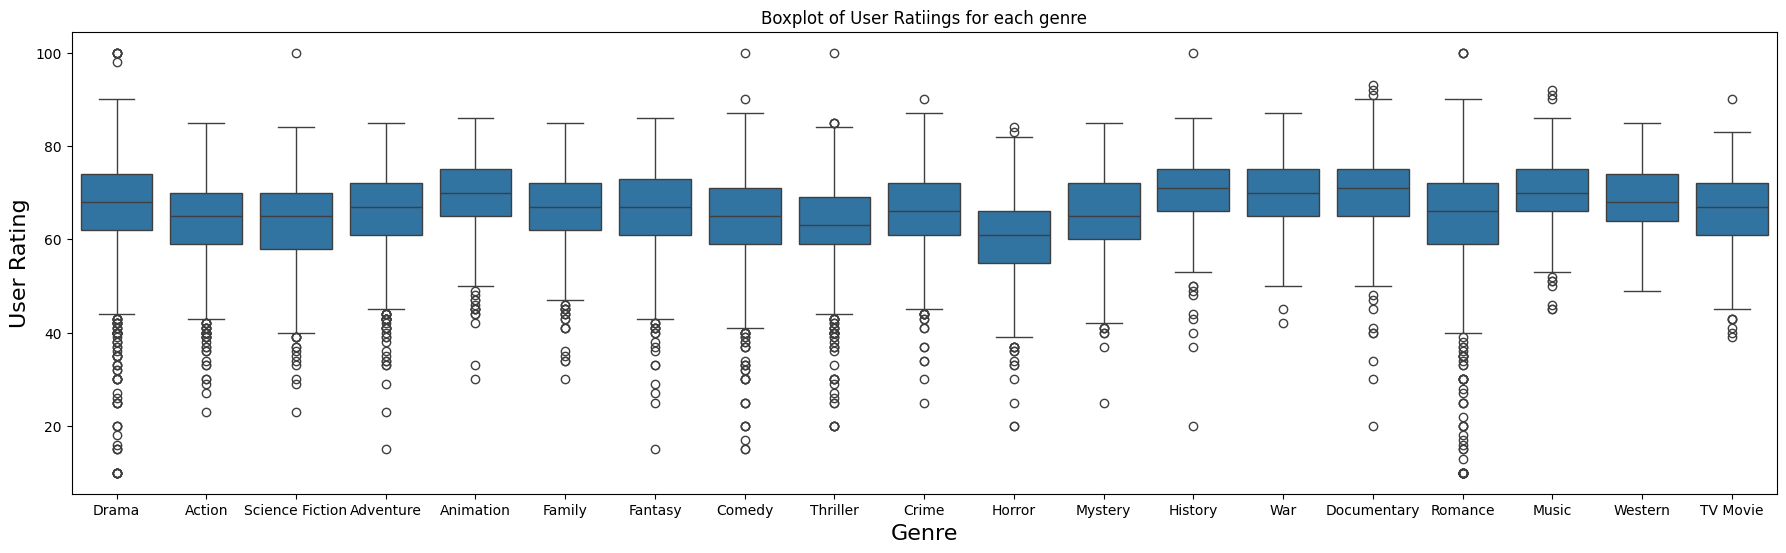

In [ ]:
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_genres, x='genre', y='user_rating')
plt.title("Boxplot of User Ratiings for each genre")
plt.xlabel("Genre", fontsize=16)
plt.ylabel("User Rating", fontsize=16)
plt.show()

The following line of code demonstrates that all genres have mean scores between 60-71, with the Music genre having the highest mean score of 70.14 and the Horror genre having the lowest mean score of 60.20.

In [ ]:
df_genres.groupby('genre')['user_rating'].mean().sort_values()

,user_rating
genre,
Horror,60.202857
Thriller,63.304603
Science Fiction,63.974293
Romance,64.246537
Action,64.565388
Comedy,64.638305
Mystery,65.123916
TV Movie,65.734375
Crime,65.790134


We will now perform the ANOVA test.

Null Hypothesis: The genre of a movie does not impact its score

Althernative Hypothesis: The genre of a movie does impact its score

The significance level of the test is alpha = 0.05

In [ ]:
genre_grouped = df_genres.groupby('genre')
genre_dfs = {Genre: group['user_rating'].array for Genre, group in genre_grouped} # transform data to arrays for ANOVA test
stats.f_oneway(*genre_dfs.values())

F_onewayResult(statistic=80.53418169693396, pvalue=1.9999744189925037e-288)

Because the p-value (1.99 * 10^-288) < 0.05, we can reject the Null hypothesis and claim that there is variation in User Ratings across different movie genres.

## Test 2

The second idea that we want to test is whether or not there is a association between the movie's genre and the country where it was produced.

Lets make a hypothesis test for this


Null Hypothesis (Ho):
There is no association between the movie's genre and the country where it was produced.

Alternate Hypothesis (Ha):
There is an association between the movie's genre and the country where it was produced.

To test this, since both are catagorical varaibles, and we want to find the relationship between them, we will use a chi squared test for independence. You can learn more about chi-squared test here: https://www.investopedia.com/terms/c/chi-square-statistic.asp.

Let us first create a contingency table for that

In [ ]:
contingency_table = pd.crosstab(df_genres['country'], df_genres['genre'])
contingency_table

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
country,,,,,,,,,,,,,,,,,,,
AR,0,1,1,10,6,2,9,1,2,1,9,1,2,5,1,0,14,0,0
AT,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
AU,1485,1090,639,1550,708,26,1740,719,705,228,519,136,438,639,689,37,1282,164,62
BE,0,1,1,1,0,0,3,1,1,0,1,0,1,0,1,0,2,0,0
BO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
BR,4,3,3,10,3,0,18,5,3,3,2,0,3,3,2,0,4,0,0
CA,10,4,3,10,6,1,27,6,5,2,24,0,5,6,11,3,22,1,0
CH,1,1,0,1,0,0,2,0,1,0,2,0,0,1,0,0,1,0,0
CL,1,0,0,2,0,0,6,1,0,0,2,0,0,0,0,0,4,0,0


### Problem with the contigency table

The contigency table has a lot of 0 values for frequency and based on the nature of our dataset, some countries has disproportionately more movies recorded compared to other countries. This affects our results. So let us clearn this data a bit to get more accurate results!!!

We will filter the countries based on the total number of movies they produced and only keep countries with more than 50 movies recorded.

In [ ]:
filtered_contingency_table = contingency_table[contingency_table.iloc[:, :].sum(axis=1) > 50]
filtered_contingency_table

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
country,,,,,,,,,,,,,,,,,,,
AR,0,1,1,10,6,2,9,1,2,1,9,1,2,5,1,0,14,0,0
AU,1485,1090,639,1550,708,26,1740,719,705,228,519,136,438,639,689,37,1282,164,62
BR,4,3,3,10,3,0,18,5,3,3,2,0,3,3,2,0,4,0,0
CA,10,4,3,10,6,1,27,6,5,2,24,0,5,6,11,3,22,1,0
CN,45,26,13,19,9,1,26,5,26,2,3,1,7,12,8,0,14,7,0
DE,8,17,6,25,13,2,44,9,8,9,13,1,4,15,4,0,16,3,1
DK,5,5,5,3,6,1,10,3,3,3,1,0,2,0,0,0,8,1,0
ES,2,8,7,49,8,6,64,10,5,8,31,1,10,22,6,1,36,3,0
FR,38,34,18,70,27,4,103,20,20,11,15,1,11,32,9,11,43,3,1


To visualize the realationship and make it more intuitive, let us normalize the data by dividing each genre-country pair by the amount of movies recorded for that country.

This will help us visualize and the data and see a relationship

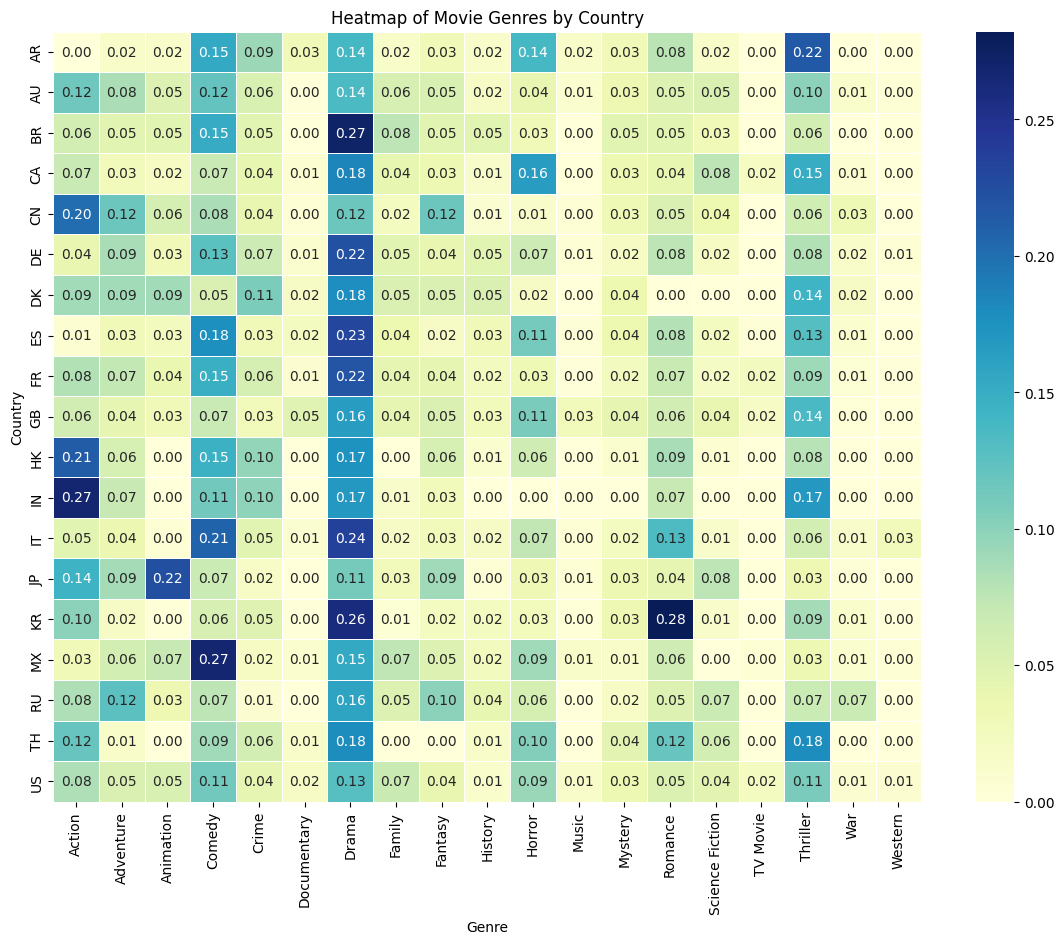

In [ ]:
percent_contingency_table = filtered_contingency_table.div(filtered_contingency_table.sum(axis=1), axis=0)
# Plot a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(percent_contingency_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Movie Genres by Country')
plt.xlabel('Genre')
plt.ylabel('Country')
plt.show()

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(filtered_contingency_table)
print("Chi-squared test results:")
print(f"Chi-squared statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-squared test results:
Chi-squared statistic: 3635.7023548178945
p-value: 0.0
Degrees of freedom: 324


From the chi squared test, we get the p value 0.0. Assuming alpha to be 0.05,

Since p value = 0.0 < alpha = 0.05, we reject the null hypothesis and claim that that there is an association between the movie's genre and the country where it was produced.

# Test 3

The next hypothesis we are curious about is if movie revenues differ between two well-known actors, Brad Pitt and Matt Damon. First, we need to filter the dataframe for movies that either Brad Pitt or Matt Damon appeared in.

In [ ]:
df_crew = df
# Spitting the string on the comma to seperate different actors
df_crew["crew"] = df_crew["crew"].apply(lambda x: list(set(x.split(", ")[:4])) if len(x.split(", ")) > 5 else list(set(x.split(", "))))
df_crew = df_crew.explode('crew').reset_index() # Creating one row for each actor in the film
df_crew["crew"] = df_crew["crew"].astype(str)
df_crew.head(10)

,index,title,release_date,user_rating,genre,crew,orig_lang,budget,revenue,country
0,0,Creed III,2023-03-02,73,"[Drama, Action]",Michael B. Jordan,English,75000000.0,2.716167e+08,AU
1,0,Creed III,2023-03-02,73,"[Drama, Action]",Adonis Creed,English,75000000.0,2.716167e+08,AU
2,0,Creed III,2023-03-02,73,"[Drama, Action]",Bianca Taylor,English,75000000.0,2.716167e+08,AU
3,0,Creed III,2023-03-02,73,"[Drama, Action]",Tessa Thompson,English,75000000.0,2.716167e+08,AU
4,1,Avatar: The Way of Water,2022-12-15,78,"[Science Fiction, Adventure, Action]",Neytiri,English,460000000.0,2.316795e+09,AU
5,1,Avatar: The Way of Water,2022-12-15,78,"[Science Fiction, Adventure, Action]",Sam Worthington,English,460000000.0,2.316795e+09,AU
6,1,Avatar: The Way of Water,2022-12-15,78,"[Science Fiction, Adventure, Action]",Zoe Saldaña,English,460000000.0,2.316795e+09,AU
7,1,Avatar: The Way of Water,2022-12-15,78,"[Science Fiction, Adventure, Action]",Jake Sully,English,460000000.0,2.316795e+09,AU
8,2,The Super Mario Bros. Movie,2023-04-05,76,"[Animation, Adventure, Family, Fantasy, Comedy]",Princess Peach (voice),English,100000000.0,7.244590e+08,AU
9,2,The Super Mario Bros. Movie,2023-04-05,76,"[Animation, Adventure, Family, Fantasy, Comedy]",Mario (voice),English,100000000.0,7.244590e+08,AU


In [ ]:
df_matt = df_crew[df_crew['crew'] == 'Matt Damon']
df_brad = df_crew[df_crew['crew'] == 'Brad Pitt']
df_matt.head()

,index,title,release_date,user_rating,genre,crew,orig_lang,budget,revenue,country
538,139,Air,2023-04-05,79,[Drama],Matt Damon,English,28519270.6,5000000.0,AU
2623,706,Spirit: Stallion of the Cimarron,2002-05-24,77,"[Western, Animation, Adventure, Comedy, Family...",Matt Damon,English,80000000.0,106515310.0,US
3298,889,The Great Wall,2017-02-16,60,"[Action, Adventure, Fantasy]",Matt Damon,English,150000000.0,334486852.0,AU
4263,1155,The Martian,2015-09-30,77,"[Drama, Adventure, Science Fiction]",Matt Damon,English,108000000.0,653609107.0,AU
4391,1190,The Last Duel,2021-10-21,75,"[Action, Drama, History]",Matt Damon,English,100000000.0,30080003.0,AU


We must now ensure that both actors do not both appear in the same movie, which would potentially violate test assumptions.

In [ ]:
df_both = df_crew[(df_crew['crew'] == 'Matt Damon') | (df_crew['crew'] == 'Brad Pitt')]
duplicate_titles = df_both[df_both.duplicated(subset='title')]

duplicate_titles

,index,title,release_date,user_rating,genre,crew,orig_lang,budget,revenue,country


We can now visualize the revenue distributions of Matt Damon movies and Brad Pitt movies. We will do this by utilizing histograms

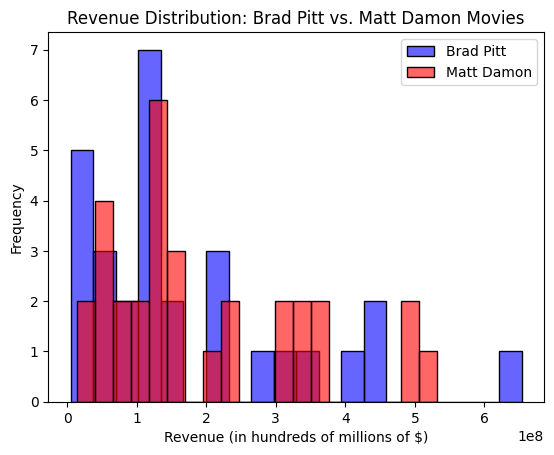

In [ ]:
matt_revenue = df_matt['revenue']
brad_revenue = df_brad['revenue']
sns.histplot(matt_revenue, color='blue', label='Brad Pitt', bins=20, alpha=0.6)
sns.histplot(brad_revenue, color='red', label='Matt Damon', bins=20, alpha=0.6)

plt.title('Revenue Distribution: Brad Pitt vs. Matt Damon Movies')
plt.xlabel('Revenue (in hundreds of millions of $)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
print(f'Matt Damon mean revenue: {matt_revenue.mean()}\nBrad Pitt mean revenue: {brad_revenue.mean()}')

Matt Damon mean revenue: 177050176.86206895
Brad Pitt mean revenue: 196765755.02580646


Their revenue distributions appear similar on the histogram, but we must still perform our hypothesis test to verify this claim

Now that we have the two filtered dataframes, we can proceed with our hypothesis test. Since revenue is a continous variable and our sample sizes are not quite large enough for a two-sample Z test and we do not meet the assumptions of normality required for a two-sample t-test, we are going to use a two-tailed Mann-Whitney U Test. This test is non-parametric (does not have normality as an assumption) so it works well for the data. You can learn more about the Mann-Whitney U Test here: https://www.technologynetworks.com/informatics/articles/mann-whitney-u-test-assumptions-and-example-363425.

Null Hypothesis: There are no differences in revenues between movies that Brad Pitt and Matt Damon appeared in

Alternative Hypothesis: There are differences in revenues between movies that Brad Pitt and Matt Damon appeared in.

Significance level (alpha) = 0.05

In [ ]:
u_statistic, p_value = stats.mannwhitneyu(matt_revenue, brad_revenue, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U Statistic: 380.0
P-value: 0.3074001191528086


Because the p-value of 0.307 > 0.05, we fail to reject the null hypothesis and conclude that Brad Pitt and Matt Damon movies have similar revenues.

#5. Primary Analysis

### Regression model
Let's build a regression model to predict the revenue of a movie given important features. This will allow movie studios to understand what attributes of a movie will help them achieve the greatest return on their investment. We will incorporate the following features into our regression model: Score, Genre, Orig_lang, Release_year, and Budget.


We first need to perform some more preprocessing to the data before we can model anything. The linear regression model requires that quantitative variables are standardized and that categorical variables are converted to a numeric form (one-hot encoding). However, before the quantitative variables can be standardized they must take a normal distribution. Thus, we must utilize a log transform to reduce their skewness (for budget and revenue). We can also create a column for a movie's release year.

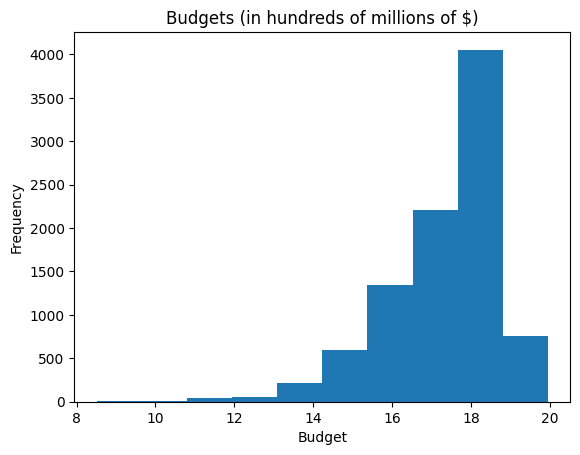

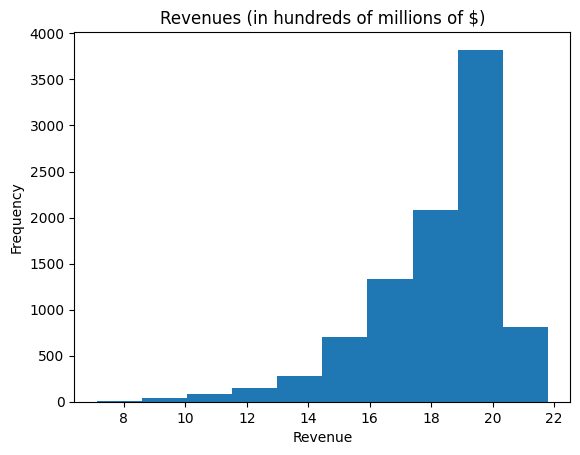

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df['release_year'] = df['release_date'].dt.year # Extracting release year from the release date

df_standardized = df
df_standardized['budget'] = np.log1p(df['budget']) # log transforms to reduce skewness
df_standardized['revenue'] = np.log1p(df['revenue'])

plt.hist(df_standardized["budget"])
plt.title("Budgets (in hundreds of millions of $)")
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.show()

plt.hist(df_standardized["revenue"])
plt.title("Revenues (in hundreds of millions of $)")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()




Now that the skewness is resolved and our quantitative variables look similar to a normal distribution, we can go ahead and standardize them.

In [ ]:
scaler = StandardScaler() # Fits data to a Standard Normal Distribution
df_standardized[['budget', 'revenue', 'user_rating']] = scaler.fit_transform(df_standardized[['budget', 'revenue', 'user_rating']])

### Encode the catagorical variables

Let us encode the catagorical varaibles Orig_lang and Genre. Since genre is a catagorical variable with list entries, we can simply use a MultiLabelBinarizer, which makes the OneHotEncoding for lists easier.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

df_standardized.reset_index(drop=True, inplace=True)
mlb = MultiLabelBinarizer()
mlb.fit(df_standardized["genre"])
encoded_df = df_standardized.join(pd.DataFrame(mlb.transform(df_standardized["genre"]), columns=mlb.classes_))

encoder = OneHotEncoder()
encoder.fit_transform(df_standardized[["orig_lang"]])
encoded_df = encoded_df.join(pd.DataFrame(encoder.transform(df_standardized[["orig_lang"]]).toarray(), columns=encoder.categories_[0]))
encoded_df = encoded_df.drop(columns=["genre", "orig_lang", "crew"])
encoded_df.columns = encoded_df.columns.str.strip()
encoded_df

,title,release_date,user_rating,budget,revenue,country,release_year,Action,Adventure,Animation,...,Serbo-Croatian,"Spanish, Castilian",Swedish,Tagalog,Tamil,Telugu,Thai,Turkish,Ukrainian,Vietnamese
0,Creed III,2023-03-02,0.812610,0.558135,0.553398,AU,2023,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Avatar: The Way of Water,2022-12-15,1.314953,1.796716,1.556530,AU,2022,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,The Super Mario Bros. Movie,2023-04-05,1.114016,0.754590,1.012499,AU,2023,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mummies,2023-01-05,0.511204,-0.676451,-0.416330,AU,2023,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Supercell,2023-03-17,-0.393012,0.576107,0.659778,US,2023,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9303,20th Century Women,2016-12-28,0.812610,-1.061387,-1.023040,US,2016,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9304,Delta Force 2: The Colombian Connection,1990-08-24,-1.096292,-0.878792,-1.179303,US,1990,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9305,The Russia House,1990-12-21,-0.393012,-0.285627,-0.602032,US,1990,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9306,Darkman II: The Return of Durant,1995-07-11,-0.995824,0.855944,0.815612,US,1995,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have finished all of our preprocessing, we can go ahead and train our Linear Regression Model! If you are curious about the inner workings of the linear regression, click on this link: https://www.geeksforgeeks.org/ml-linear-regression/.

### Model 1 Linear Regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = encoded_df.drop(columns=["title", "release_date", "country", "revenue"]) # dropping unnecessary columns
y = encoded_df["revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # splitting the data into training and test sets
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # Predicted Values
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

MSE: 0.5261330596961749
R^2: 0.45791671293939096


Given the relatively high values for the Mean Squared Error and $R^2$ value, the data does not seem to be very linearly related, as the $R^2$ value indicates that the model only accounts for roughly 45% of the variation in a movie's revenue. Therefore, we can apply the Random Forest Regression Model to see if it captures more complex relationships in the data. You can find more information on the Random Foresrt Model by visiting this link: https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/.

### Model 2 Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

MSE: 0.4048227058764112
R^2: 0.5829047062638885


The Random Forest model performed significantly better, managing an R^2 value of around 0.6! That means the model accounts for roughly 60% of the variance in a movie's revenue, and is an overall solid predictor of revenue. Lastly, let's see if a feed-forward and fully-connected Neural Network can outperform the Random Forest model.

### Model 3 Neural Network
Neural Networks are a powerful type of Machine Learning Algorithm that takes inspiration from the human brain. They are quite complicated, but an introduction to the concept of a Neural Network for beginners can be found here: https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32) # Placing training data into a DataLoader
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32) # Placing test data into a DataLoader
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class NeuralNetworkModel(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetworkModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256) # Four fully connected layers
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU() # ReLU activation function

    def forward(self, x):
        x = self.relu(self.fc1(x)) # Forward Steps (employs ReLU for non-linearity)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

input_size = X_train.shape[1]
model = NeuralNetworkModel(input_size)
criterion = nn.MSELoss() # Loss function in the Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
losses = [] # Stores the average Mean Squared Error for each Epoch
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad() # zeroes out the gradients
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch) # calculates the Mean Squared Error for the batch
        loss.backward() # Backwards Propogation
        optimizer.step()
        epoch_loss += loss.item() # sums up all the MSEs

    losses.append(epoch_loss/len(train_loader))
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader)}")


Epoch 1/100, Loss: 2.8915093057657004
Epoch 2/100, Loss: 1.0582406078285413
Epoch 3/100, Loss: 1.018677519242651
Epoch 4/100, Loss: 0.8641466872502805
Epoch 5/100, Loss: 0.7523766472104282
Epoch 6/100, Loss: 0.7138012447454387
Epoch 7/100, Loss: 0.6957012668188037
Epoch 8/100, Loss: 0.6712798442004064
Epoch 9/100, Loss: 0.6685144135752461
Epoch 10/100, Loss: 0.5791996094546092
Epoch 11/100, Loss: 0.6262234524851705
Epoch 12/100, Loss: 0.5669658020330601
Epoch 13/100, Loss: 0.627862312890941
Epoch 14/100, Loss: 0.583588260501751
Epoch 15/100, Loss: 0.5791172859750592
Epoch 16/100, Loss: 0.5552557838577058
Epoch 17/100, Loss: 0.5733954181231142
Epoch 18/100, Loss: 0.5902456567650701
Epoch 19/100, Loss: 0.55001066804188
Epoch 20/100, Loss: 0.5825025403128673
Epoch 21/100, Loss: 0.5426973457819914
Epoch 22/100, Loss: 0.5545688517743426
Epoch 23/100, Loss: 0.5509667880673266
Epoch 24/100, Loss: 0.5510557927031374
Epoch 25/100, Loss: 0.5459322914033489
Epoch 26/100, Loss: 0.5669767783051397


Now that we've trained our neural network, it's time to see what it can do!

#6. Visualization

The following plot exhibits how the Mean Squared Error of the Neural Network's predictions converges to a value of around 0.5 after about 75 epochs.

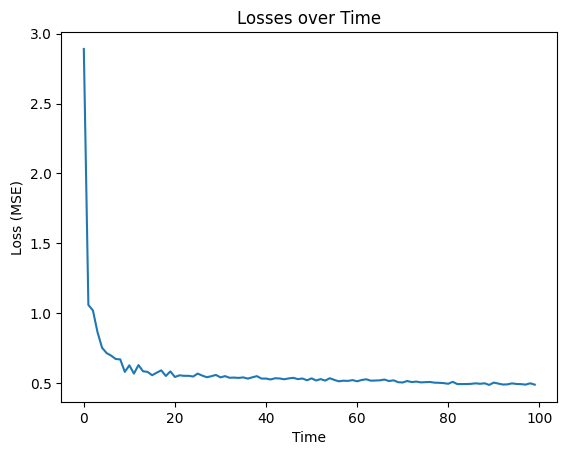

In [ ]:
plt.plot(losses)
plt.title("Neural Network over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
model.eval()
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader: # This loop retrieves all predicted and actual revenue values
        y_pred = model(X_batch)
        predictions.extend(y_pred.numpy())
        actuals.extend(y_batch.numpy())

predictions = np.array(predictions).flatten()
actuals = np.array(actuals).flatten()

mse = mean_squared_error(actuals, predictions)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print("Test Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



Test Metrics:
Mean Squared Error (MSE): 0.43563446402549744
Mean Absolute Error (MAE): 0.43936771154403687
R-squared (R2): 0.5511589050292969


The Neural Network performed slighly worse than the Random Forest model overall, but still produced a positive $R^2$ value that is close to 0.55.

A core tenet of any data analysis is to visualize the data and its relationships. We will first investigate the relationship between all the features we included in the model and revenue.

As discussed previously, there appers to be a positive linear relationship between budget and revenue. Now let's look at the relationship between user_rating and revenue.

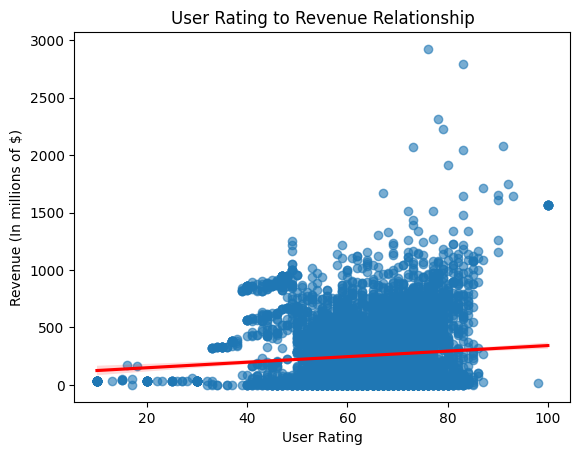

In [ ]:
sns.regplot(data=df_numeric, x='user_rating', y='revenue', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title("User Rating to Revenue Relationship")
plt.xlabel('User Rating')
plt.ylabel('Revenue (In millions of $)')
plt.show()

Surpirsingly, it seems that a movies user_rating has little to no bearing on how much revenue it makes. We can now take a look at how the categorical variables impact a movie's revenue.

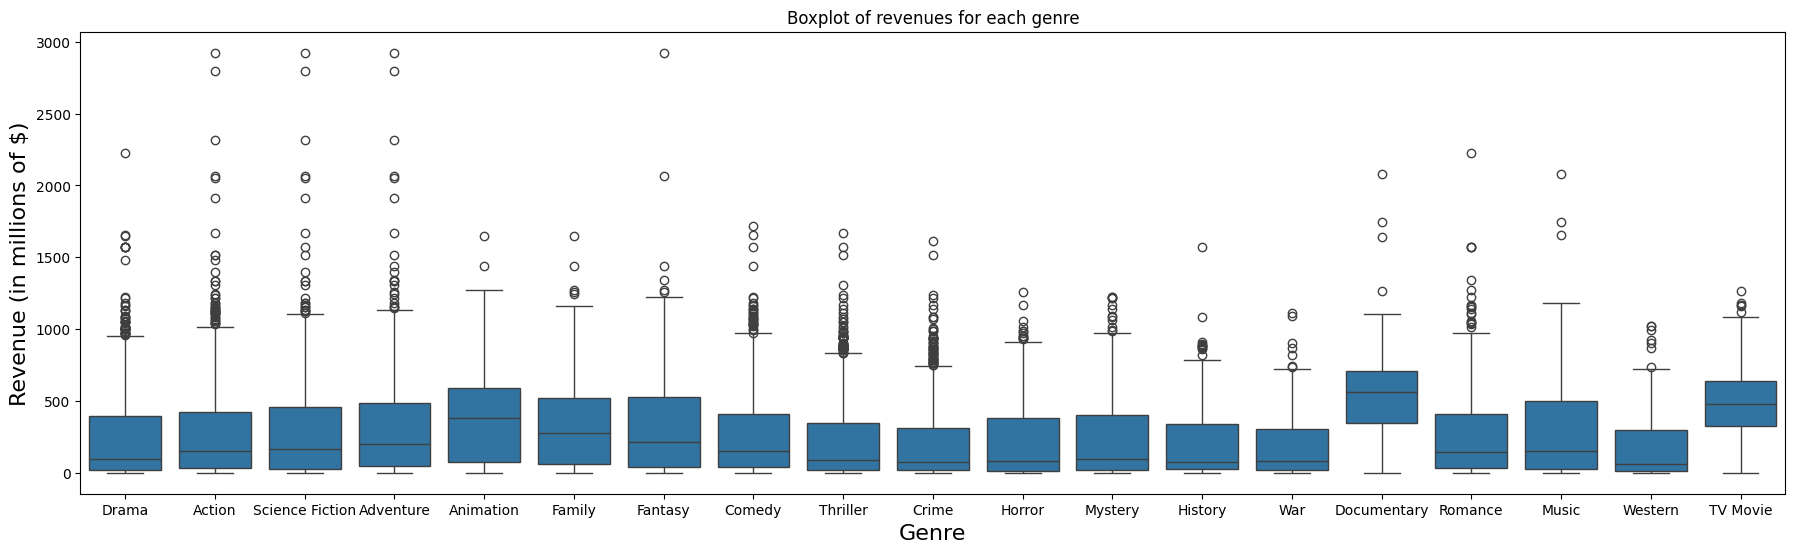

In [ ]:
df_genres["revenue"] = df_genres["revenue"].apply(lambda x: x/10**6) # converting revenue to millions of $
plt.figure(figsize=(22, 6))
sns.boxplot(data=df_genres, x='genre', y='revenue')
plt.title("Boxplot of revenues for each genre")
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Revenue (in millions of $)", fontsize=16)
plt.show()

In [ ]:
df_genres.groupby('genre')['revenue'].mean().sort_values()

,revenue
genre,
War,189.372719
Crime,194.009851
Western,194.395185
History,200.594309
Thriller,207.289234
Horror,211.520053
Drama,228.603223
Mystery,231.865068
Comedy,251.087601


The chart above shows that the mean revenues vary significantly across genres. Documentaries have the highest average revenues while War movies have the lowest average revenues. Now let's take a look at how a movie's original language impacts its revenue for the top twenty most used languages in the dataset.

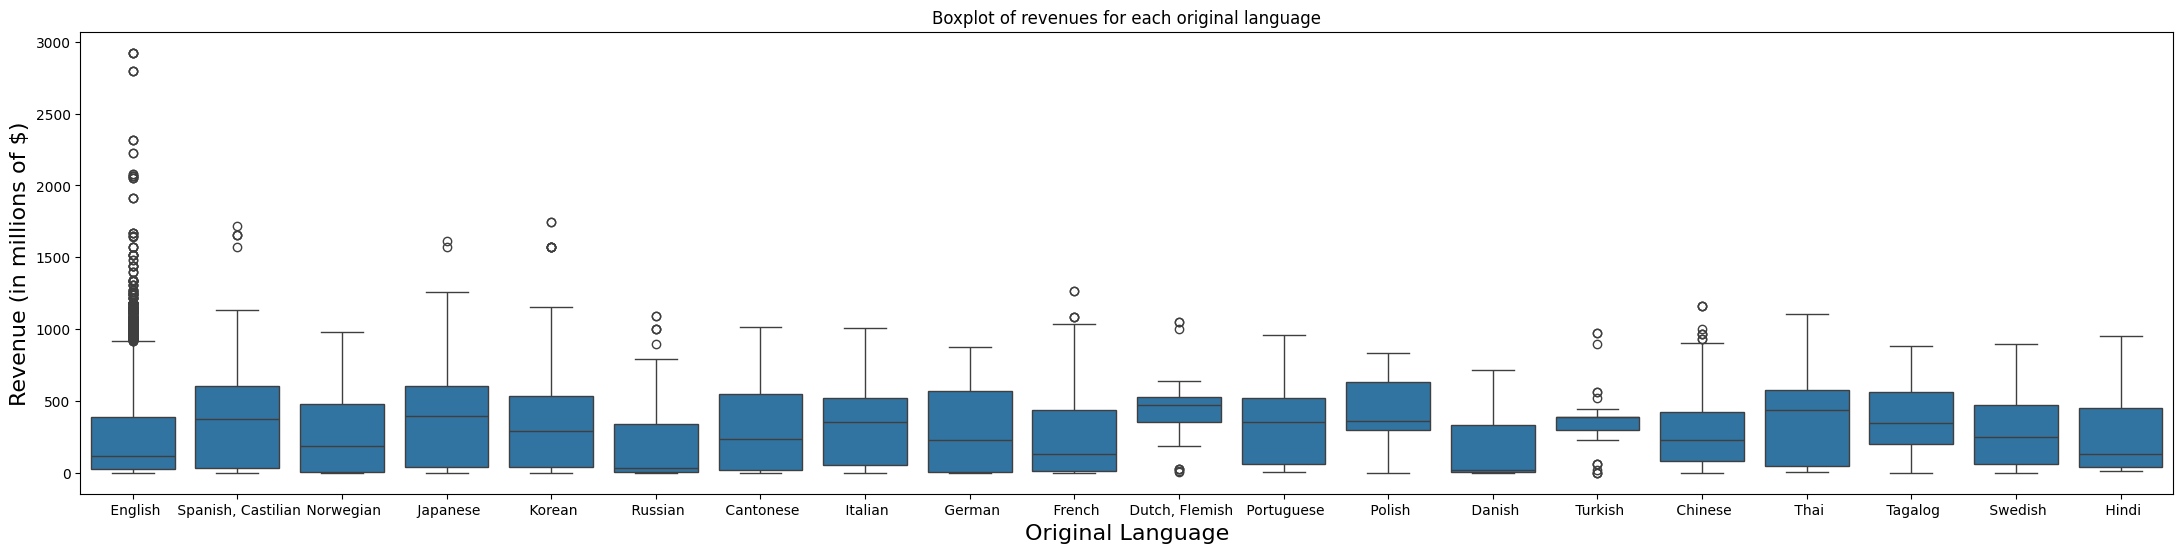

In [ ]:
df_lang = df_genres
language_counts = df_lang['orig_lang'].value_counts() # Getting the number of movie's in each language
languages = language_counts[language_counts >= 30].index # only keep languages with at least 30 movies in the dataset
df_lang = df_lang[df_lang['orig_lang'].isin(languages)]

plt.figure(figsize=(27, 6))
sns.boxplot(data=df_lang, x='orig_lang', y='revenue')
plt.title("Boxplot of revenues for each original language")
plt.xlabel("Original Language", fontsize=16)
plt.ylabel("Revenue (in millions of $)", fontsize=16)
plt.show()

In [ ]:
df_lang.groupby('orig_lang')['revenue'].mean().sort_values()

,revenue
orig_lang,
Danish,178.263588
Russian,187.196971
English,236.149424
French,249.931286
Hindi,255.586156
Norwegian,259.663836
Swedish,290.127624
Cantonese,291.694547
Chinese,292.155405


The boxplot and chart illustrate that there does appear to be an association between a movie's original language and revenue. Shockingly, English language movies have a relatively low average revenue compared to other languages like Dutch or Polish - perhaps because there are so many English movies in the dataset. Finally, we can take a look at how movie revenues have changed over time.

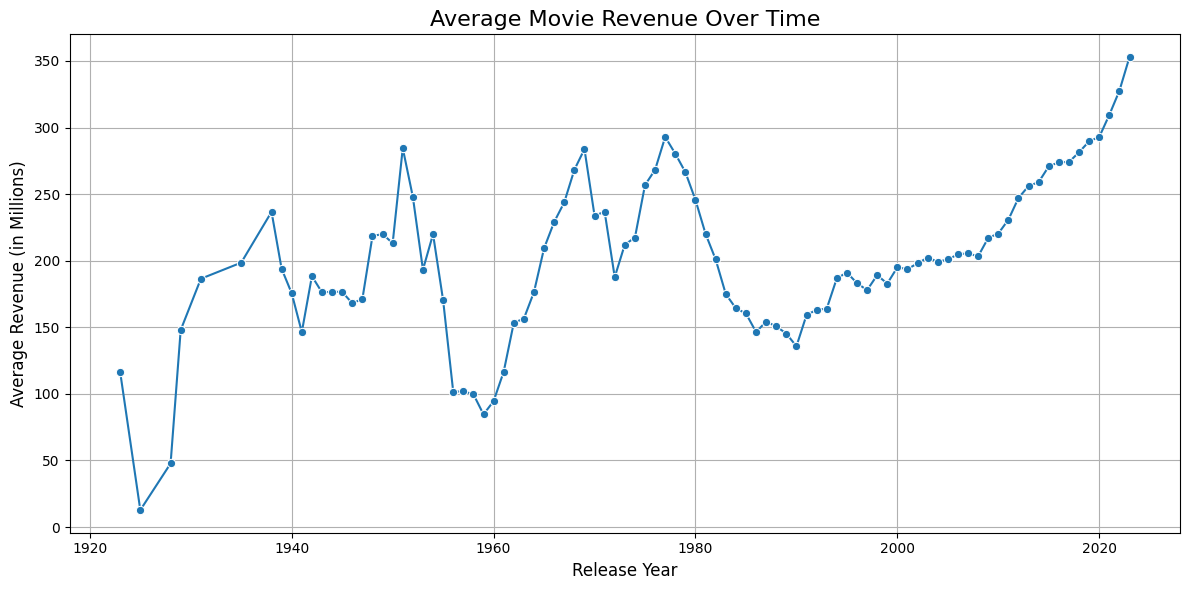

In [ ]:
df_genres['release_year'] = df_genres['release_date'].dt.year
revenue_by_year = df_genres.groupby('release_year')['revenue'].mean() # Retrieves average movie revenue for eah year
revenue_by_year = revenue_by_year.rolling(window=5).mean() # Uses a rolling average from the past five years

plt.figure(figsize=(12, 6))
sns.lineplot(x=revenue_by_year.index, y=revenue_by_year.values, marker='o')
plt.title('Average Movie Revenue Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Average Revenue (in Millions)', fontsize=12)
plt.grid(True)
plt.tight_layout()

As expected, movie revenues have generally increased over time (with a few exceptions) due to inflation.

#7. Insights and Conclusions

Core Takeaways:


*   A movie's Budget and Revenue have a positive linear relationship
*   A movie's User Rating has no correlation with its revenue
*   A movie's Original Language has an association with its revenue
*   A movie's Genre has a small association with its revenue

This project serves to inform an uninformed reader about the significant elements of the dataset along with the analysis. After reading, the reader should be able to understand the relationships between revenue, budget, user ratings, and other categorical variables such as genre and country of production. Furthermore, they should understand how linear regression, random forest, and neural networks all differ in performance and the difficulties in using these models to make predictions about the dataset. Lastly, they should be able to understand the main findings, such as the strong correlation between revenue and budget or the variation in revenue between different genres.

For a reader that is mostly informed on this topic, the findings can still provide new knowledge and insights. For example, the analytical findings show that even our best model only accounts for about 60% of the variation in revenue, suggesting that there is room for improvement. An informed reader could attempt to improve upon our analysis by incorporating the release_month or main_actor features in their Machine Learning models. Furthermore, the overall solid performance of each Machine Learning model demonstrates that they can potentially be used on similar datasets for analysis. Lastly, an informed reader would view the positive revenue-budget correlation as expected given that this is a common trend in the film industry.

Overall, the analysis and findings of this project show the financial factors that go into a movie production. We can conclude that a movie's revenue is strongly impacted by budget and less impacted by other factors such as genre, language, or user ratings. In addition, our models suggest that high-budget Documentaries are perhaps an untapped market that could result in large revenues for the movie producer.